# <center>EDSA Team 18 Project</center>

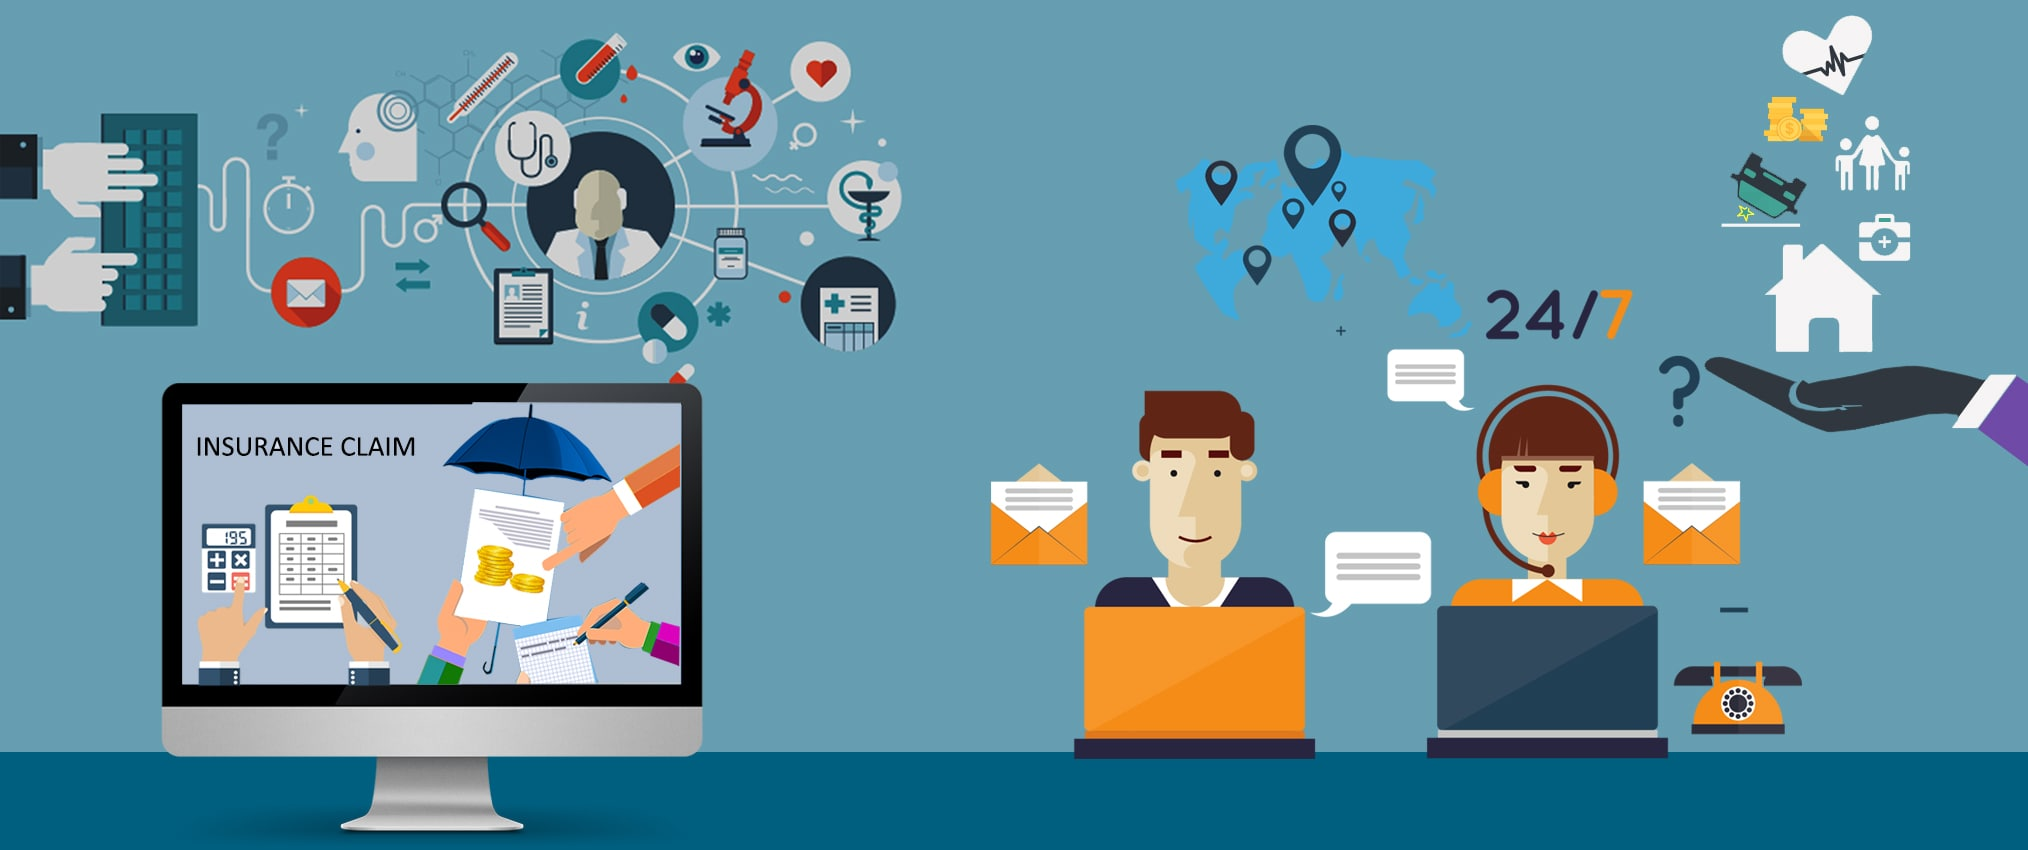

<a id='Table_Contents'></a><br>
### Table of Contents
1. [Introduction](#intro)
 
 
2. [Data](#imports_data)
 * Importing Packages
 * Loading Data
 * Dataset Description
 * Checking for Missing Values
 
3. [Exploratory Data Analysis](#EDA)

4. [Data Preprocessing](#feat_eng)

5. [Model Building](#model)
 




<a id='intro'></a><br>
## 1. Introduction
[Back to Table of Contents](#Table_Contents)


The aim of this project is to predict the total claim amount per exposure, for specific risk profiles. A risk profile describes a policyholder (someone who is a client and owns a policy at the insurer), things like age, gender, marital status, etc. These attributes can all be found in the dataset used in this project. The reason for doing this is so that the predicted claim can be used to calculate a premium for new applicants, based on their predicted risk. This way the insurer maximises profits by charging higher premiums for higher risk profiles. It is important to consider however that accompanying a higher premium, the insurer should maintain sensibility in deciding on a premium and still outcompete competitor insurers, which make business rules essential. 

<a id='imports_data'></a><br>
## 2. Data
[Back to Table of Contents](#Table_Contents)

## Importing Packages

In [12]:
import pandas as pd
import numpy as np
from math import sqrt
from datetime import datetime
from time import time
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display_html 
from IPython.core.display import HTML
from plotly.offline import init_notebook_mode, iplot, plot
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = 100

import re
import pickle
from sklearn.linear_model import LinearRegression # Linear regression
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

## Loading Data

We first load the data and inspect its head.

In [2]:
df = pd.read_excel('DataSet.xlsx')
#df.head()

In [3]:
# Data shape
df.shape

(262990, 45)

The data contains 262990 rows and 45 columns.

In [4]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262990 entries, 0 to 262989
Data columns (total 45 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   PolicyId                              262990 non-null  int64         
 1   ClaimId                               27478 non-null   float64       
 2   SumTotalClaimAmount                   27392 non-null   float64       
 3   CountTotalClaimAmount                 27478 non-null   float64       
 4   PremiumSum                            262750 non-null  float64       
 5   CasePremiumSum                        262750 non-null  float64       
 6   PaymentDueDate                        262750 non-null  datetime64[ns]
 7   TotalPremiumPaymentCount              262750 non-null  float64       
 8   PreviousInsurerExcess                 262963 non-null  float64       
 9   PreviousInsurerPremium                262961 non-null  floa

We observe that there are some columns with missing values. 

In [5]:
# Data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PolicyId,262990.0,1.084961e+07,51720.661654,1.076784e+07,1.080422e+07,1.084769e+07,1.089272e+07,1.095790e+07
ClaimId,27478.0,1.010507e+07,15069.963591,1.007378e+07,1.009240e+07,1.010566e+07,1.011831e+07,1.012987e+07
SumTotalClaimAmount,27392.0,4.059307e+04,65213.503869,0.000000e+00,3.415500e+03,1.391817e+04,4.461965e+04,1.754000e+06
CountTotalClaimAmount,27478.0,1.256787e+00,0.574605,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00
PremiumSum,262750.0,4.589583e+03,3538.634556,0.000000e+00,1.988050e+03,3.568235e+03,6.351193e+03,4.182255e+04
CasePremiumSum,262750.0,3.709207e+03,3718.507791,0.000000e+00,7.191375e+02,2.743360e+03,5.620938e+03,4.182255e+04
TotalPremiumPaymentCount,262750.0,4.623604e+00,4.066673,0.000000e+00,1.000000e+00,4.000000e+00,7.000000e+00,1.400000e+01
PreviousInsurerExcess,262963.0,2.923134e+03,6031.299346,-1.000000e+00,0.000000e+00,0.000000e+00,5.000000e+03,8.000000e+05
PreviousInsurerPremium,262961.0,5.767832e+02,654.862704,-1.700000e+03,0.000000e+00,4.580000e+02,1.070000e+03,2.300000e+04
IsMemberPayer,262990.0,9.662154e-01,0.180675,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
# Percentage missing values
df.isnull().mean().sort_values(ascending=False)*100

Employer                                97.229552
SumTotalClaimAmount                     89.584395
ClaimId                                 89.551694
CountTotalClaimAmount                   89.551694
PolicyEndDate                           48.745580
DaysSinceInception                      48.745580
MonthsSinceInception                    48.745580
Area                                    25.515419
SumAssured                              15.992243
IndustryType                             1.570782
EmploymentType                           1.009924
Occupation                               0.854025
TotalPremiumPaymentCount                 0.091258
PaymentDueDate                           0.091258
CasePremiumSum                           0.091258
PremiumSum                               0.091258
PreviousInsurerPremium                   0.011027
PreviousInsurerExcess                    0.010267
Gender                                   0.003042
PolicyStatus                             0.002281


We observe that Employer, SumTotalClaimAmount, ClaimId and CountTotalClaimAmount columns all have a high percentage of missing values (over 89%). PolicyEndDate, DaysSinceInception and MonthsSinceInception have 48% missing values while Area has 25% and SumAssured has 15%. These columns will be further explored in the data preprocessing section of the project.                                                                                                                                                                                                         

<a id='EDA'></a><br>
## 3. Exploratory Data Analysis
[Back to Table of Contents](#Table_Contents)
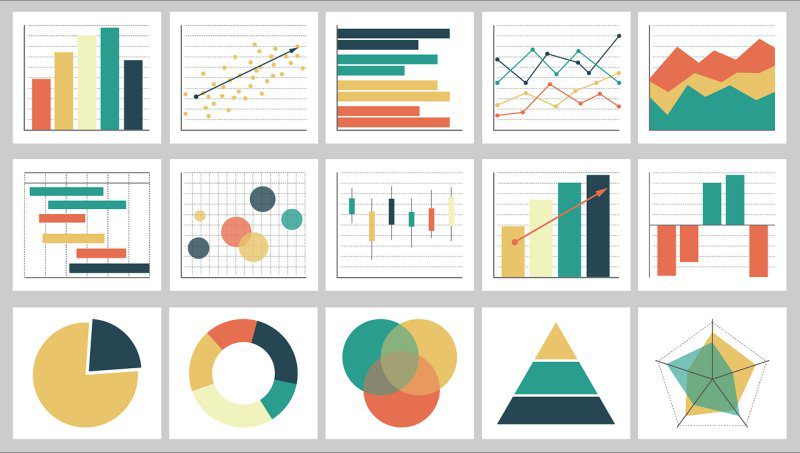

In this section we perform exploratory data analysis on the data to gain a better understanding of the features and the relationships between them. We will employ both statistical and visualisation methods of EDA.

## Data Cleaning 
We do the following basic data cleaning before embarking on the EDA:
1. Drop the last column as it is irrelevant
2. Impute NaN values in the 'SumTotalClaimAmount' and 'CountTotalClaimAmount' columns with 0
3. Create an 'Age' column using 'BirthDt'

In [13]:
#Make copy
df_copy = df.copy()
#Drop the last column
df_copy = df_copy.iloc[: , :-1]


In [14]:
#Impute NaN values for 'SumTotalClaimAmount' and 'CountTotalClaimAmount' columns
df_copy['SumTotalClaimAmount'].fillna(0, inplace=True)
df_copy['CountTotalClaimAmount'].fillna(0, inplace=True)


In [15]:
#Create 'Age' column
now = pd.Timestamp('now')
df_copy['BirthDt'] = pd.to_datetime(df_copy['BirthDt'], format='%m%d%y')    # 1
df_copy['BirthDt'] = df_copy['BirthDt'].where(df_copy['BirthDt'] < now, df_copy['BirthDt'] -  np.timedelta64(100, 'Y'))   # 2
df_copy['Age'] = (now - df_copy['BirthDt']).astype('<m8[Y]')

## Correlation of Features
We explore the correlation of the features to the target variable and to each other.

In [16]:
#Correlation of features
columns = list(df_copy.columns)
irrelevant_feat = ['PolicyId', 'ClaimId ', 'VehicleYear']
relevant_feat = [x for x in columns if x not in irrelevant_feat]
df_copy[relevant_feat].corr()

,SumTotalClaimAmount,CountTotalClaimAmount,PremiumSum,CasePremiumSum,TotalPremiumPaymentCount,PreviousInsurerExcess,PreviousInsurerPremium,IsMemberPayer,CubicCapacity,Cyl,Kilowatts,MonthsSinceInception,DaysSinceInception,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount,NomimatedDriversUnder30Count,Age
SumTotalClaimAmount,1.000000,0.553535,0.062766,0.062803,0.032719,0.016626,0.025488,0.002995,-0.011273,-0.015999,0.008464,0.026448,0.026788,0.058844,0.058158,0.013615,-0.041177,0.018144,-0.001243,0.011733,-0.046560
CountTotalClaimAmount,0.553535,1.000000,0.219611,0.224151,0.199623,0.013259,0.028129,0.005359,-0.018159,-0.018181,0.009737,0.158876,0.160093,0.045395,0.053107,0.054557,0.025593,-0.020909,0.023299,0.027678,-0.054110
PremiumSum,0.062766,0.219611,1.000000,0.929425,0.779827,0.066375,0.157109,0.009417,0.029850,-0.024453,0.110891,0.533948,0.534514,0.326275,0.303627,0.346171,0.177192,0.034578,0.100676,0.073290,-0.132191
CasePremiumSum,0.062803,0.224151,0.929425,1.000000,0.883102,0.045597,0.107036,-0.000763,0.017296,-0.025852,0.082787,0.610786,0.612088,0.252367,0.259096,0.387786,0.293609,0.014279,0.117991,0.077908,-0.087455
TotalPremiumPaymentCount,0.032719,0.199623,0.779827,0.883102,1.000000,-0.004766,-0.006639,-0.012016,-0.001139,0.002072,-0.000577,0.675016,0.676747,-0.016324,0.009930,0.193603,0.293913,-0.069833,0.145511,0.078316,0.021561
PreviousInsurerExcess,0.016626,0.013259,0.066375,0.045597,-0.004766,1.000000,0.442726,0.026939,-0.062386,-0.054648,-0.025591,0.011308,0.011492,0.117590,0.120901,0.081235,-0.013035,0.083602,-0.041376,-0.010484,-0.126473
PreviousInsurerPremium,0.025488,0.028129,0.157109,0.107036,-0.006639,0.442726,1.000000,0.045403,-0.054820,-0.062145,0.020394,0.017792,0.018161,0.279245,0.169071,0.114564,-0.036698,0.002855,-0.039142,-0.016626,-0.152416
IsMemberPayer,0.002995,0.005359,0.009417,-0.000763,-0.012016,0.026939,0.045403,1.000000,-0.015671,-0.007861,-0.008351,-0.006163,-0.006256,0.014238,0.016676,-0.004235,-0.027872,0.002051,-0.077356,-0.052299,-0.072864
CubicCapacity,-0.011273,-0.018159,0.029850,0.017296,-0.001139,-0.062386,-0.054820,-0.015671,1.000000,0.714084,0.765137,-0.007508,-0.007432,0.243099,0.042146,0.013468,-0.028300,-0.046639,0.037027,-0.020122,0.234293
Cyl,-0.015999,-0.018181,-0.024453,-0.025852,0.002072,-0.054648,-0.062145,-0.007861,0.714084,1.000000,0.544440,-0.004858,-0.004612,0.023766,-0.079592,-0.085160,-0.041439,-0.070697,0.030240,-0.006069,0.145064


Next we create a correlation heatmap of the features

<AxesSubplot:>

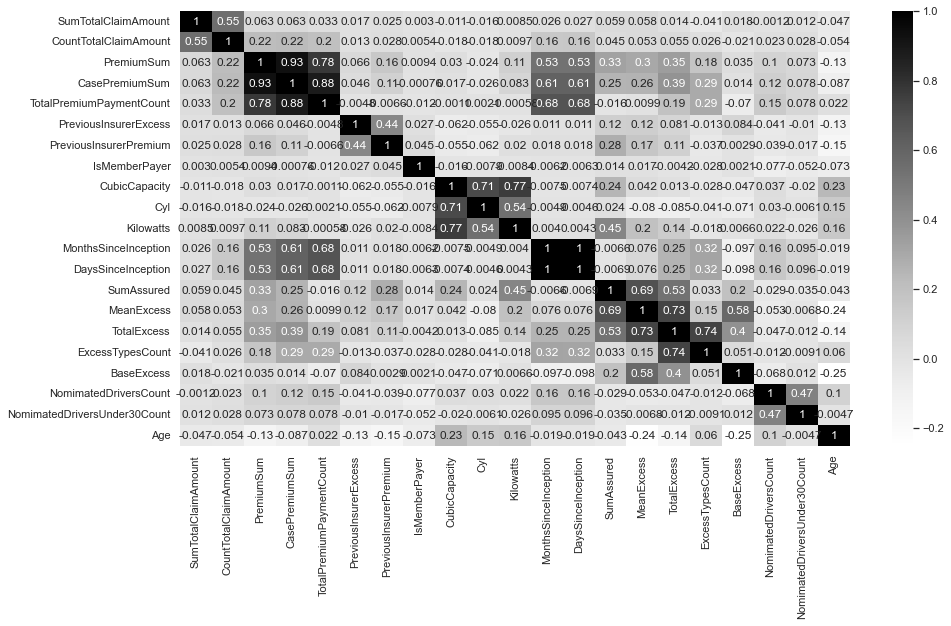

In [17]:
#Correlation heatmap
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_copy[relevant_feat].corr(), annot=True, cmap='Greys')

From the correlation heatmap above we observe the following:
1. The target variable 'SumTotalClaimAmount' is not highly correlated to any of the features
2. Strong correlation between 'PremiumSum' and 'CasePremiumSum', 'PremiumSum' and 'TotalPremiumPaymentCount', 'CasePremiumSum' and 'TotalPremiumPaymentCount', 'CubicCapacity' and 'Killowatts', 'MeanExcess' and 'TotalExcess'
3. Moderate correlation between 'SumTotalClaimAmount' and 'CountTotalClaimAmount', 'PremiumSum' and 'MonthsSinceInception', 'PremiumSum' and 'DaysSinceInception', 'PremiumSum' and 'SumAssured', 'PremiumSum' and 'MeanExcess', 'PremiumSum' and 'TotalExcess', 'CasePremiumSum' and 'MonthsSinceInception', 'CasePremiumSum' and 'DaysSinceInception', 'CasePremiumSum' and 'TotalExcess'
3. Weak correlation between all the other features

## Claims Count Distribution
We create a count plot to investigate how the number of claims per customer is distributed

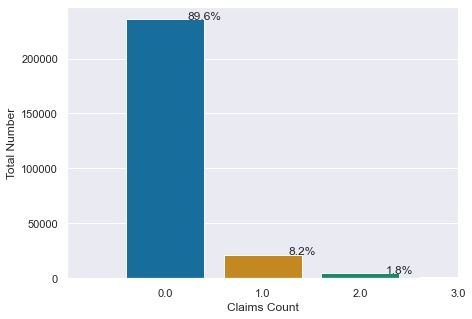

In [18]:
# Claims count distribution
sns.set_style("darkgrid")
plt.figure(figsize=(7,5))
ax = sns.countplot(x ='CountTotalClaimAmount', data = df_copy, palette='colorblind')
plt.xlabel('Claims Count')
plt.ylabel('Total Number')
total = float(len(df_copy))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlim([-1, 3])
plt.show()


We observe that majority of customers (89.6%) had zero claims, 8.2% had one claim and 1.8% had 2 claims.

## Categorical Features 
Next we explore how categorical features such as EmploymentType, Gender affect the claim amount

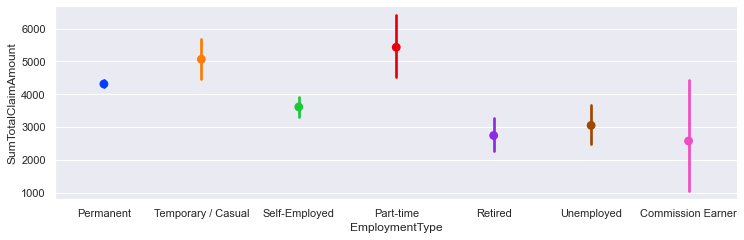

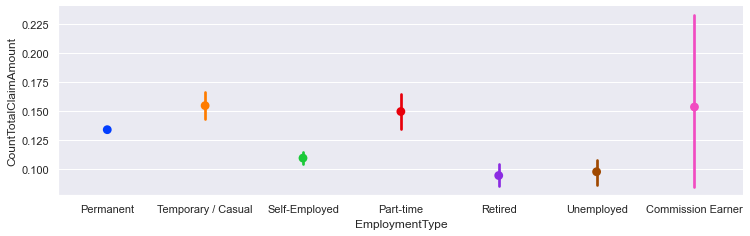

In [19]:
#Claims amount and claims count distribution per employment type
sns.set_theme(style="darkgrid")
sns.catplot(x="EmploymentType", y="SumTotalClaimAmount", data=df_copy, kind='point', height=3.5, aspect=3, palette='bright')
sns.catplot(x="EmploymentType", y="CountTotalClaimAmount", data=df_copy, kind='point', height=3.5, aspect=3, palette='bright')


<AxesSubplot:xlabel='EmploymentType', ylabel='count'>

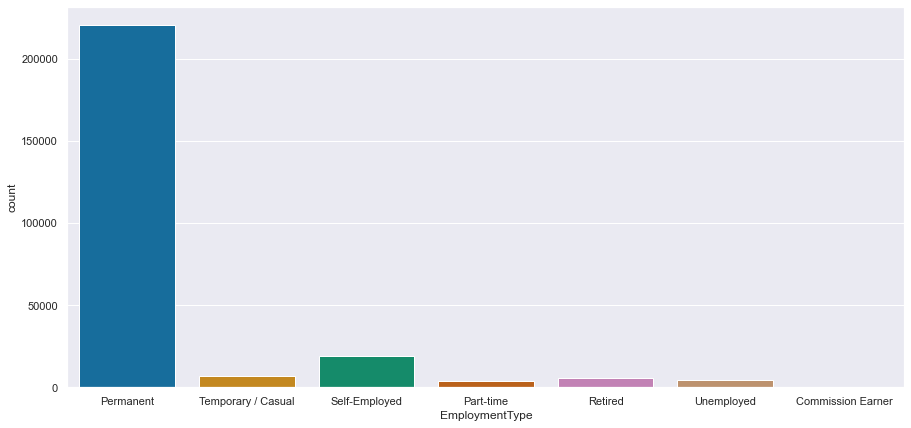

In [20]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,7))
sns.countplot(x ='EmploymentType', data = df_copy, palette='colorblind')

We observe that part-time employees had the highest claim amount with commission earners having the least claim amount. However, commision earners had the highest claim count with retired employees having the least claim count. 

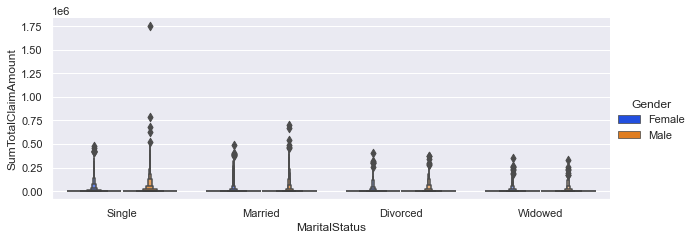

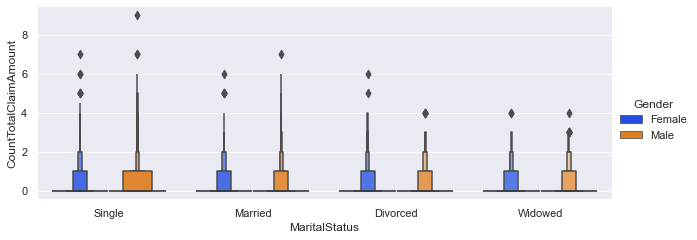

In [15]:
#Claim size and count per gender and marital status distribution
sns.catplot(x="MaritalStatus", y="SumTotalClaimAmount", hue="Gender",
                 data=df_copy, kind='boxen', height=3.5, aspect=2.5, palette='bright')
sns.catplot(x="MaritalStatus", y="CountTotalClaimAmount", hue="Gender",
                 data=df_copy, kind='boxen', height=3.5, aspect=2.5, palette='bright')

We observe that singles had a more claim amount and count as compared to the other marital status with males claiming more than females in each of the status.

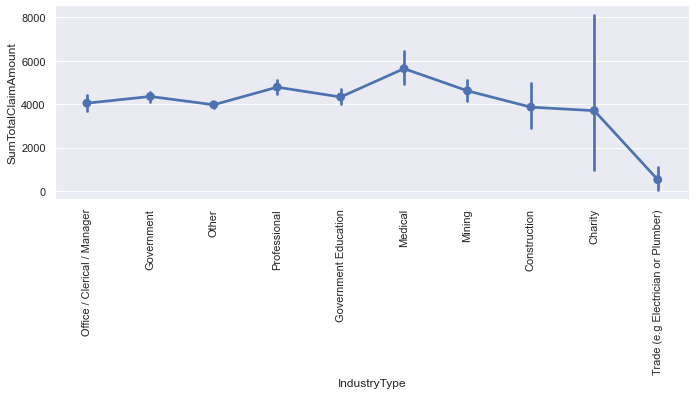

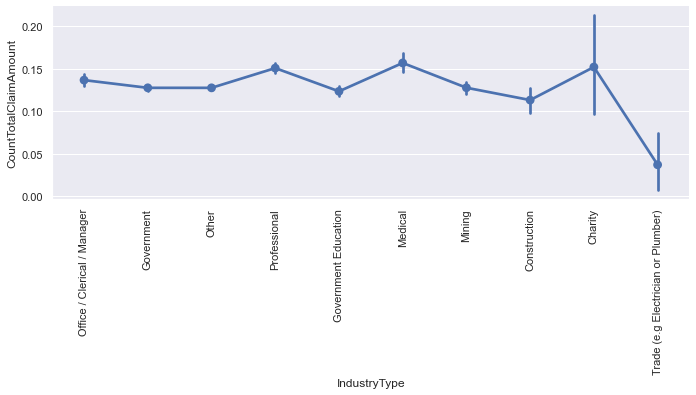

In [16]:
#Claims size and count per industry type distribution
sns.catplot(x="IndustryType", y="SumTotalClaimAmount",
            data=df_copy, kind='point', height=3.5, aspect=3)
plt.xticks(rotation=90)
sns.catplot(x="IndustryType", y="CountTotalClaimAmount",
            data=df_copy, kind='point', height=3.5, aspect=3)
plt.xticks(rotation=90)
plt.show()

From the plot above we observe that customers in the medical industry have the highest claim amounts and claim counts with those in the Trade industry having the lowest claim amounts.

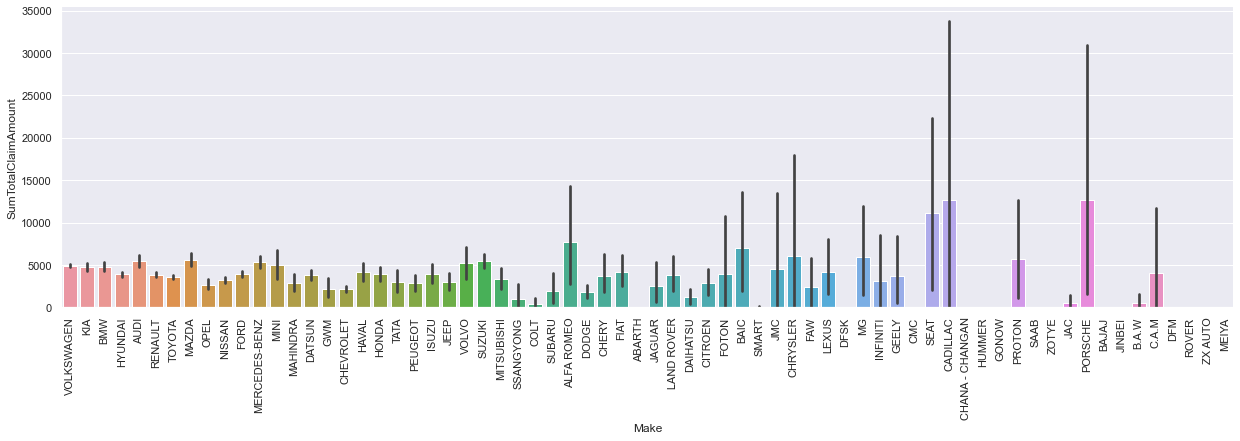

In [17]:
#Claims amount versus make of vehicle
sns.catplot(x="Make", y="SumTotalClaimAmount",
            data=df_copy, kind='bar', height=5, aspect=3.5)
plt.xticks(rotation=90)
plt.show()

We observe that Porsche owner have the highest claim amounts with some other vehicle make owners such as CMC, DFM having zero claim amounts. Cadillac owners follow closely with Seat owners coming in third.

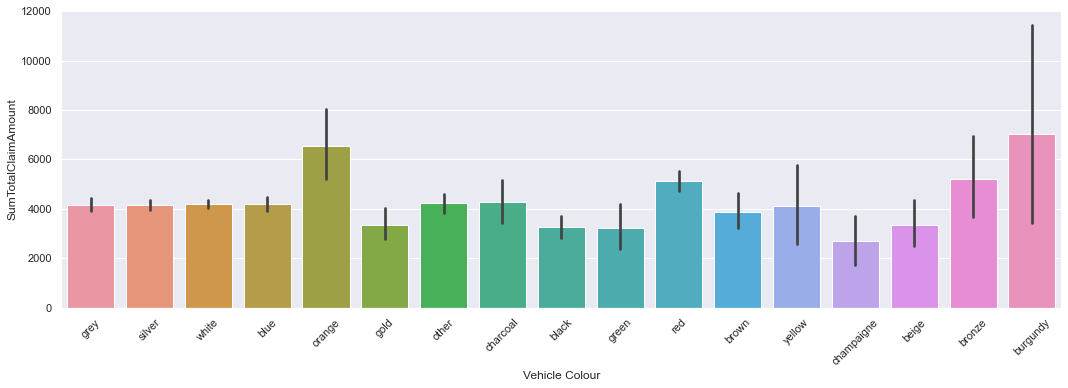

In [18]:
#Claim Amount Versus Vehicle Colour
sns.catplot(x="Colour", y="SumTotalClaimAmount",
            data=df_copy, kind='bar', height=5, aspect=3)
plt.xticks(rotation=45)
plt.xlabel('Vehicle Colour')
plt.show()

We observe that burgundy colored vehicle owners claimed a higher amount with champaigne colored vehicle owners claiming the least amount

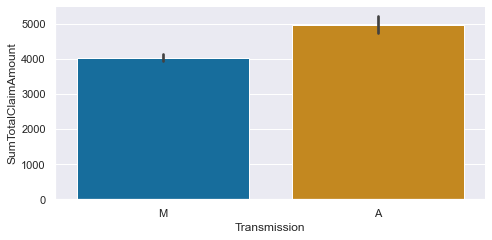

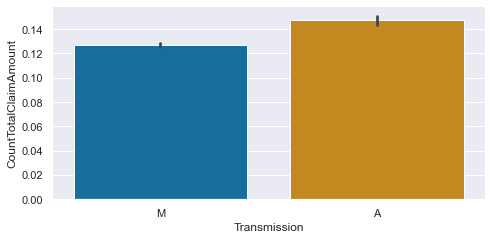

In [19]:
#Claim Amount Versus Transmission
sns.catplot(x="Transmission", y="SumTotalClaimAmount",
            data=df_copy, kind='bar', height=3.5, aspect=2, palette='colorblind')

sns.catplot(x="Transmission", y="CountTotalClaimAmount",
            data=df_copy, kind='bar', height=3.5, aspect=2, palette='colorblind')

<AxesSubplot:xlabel='Transmission', ylabel='count'>

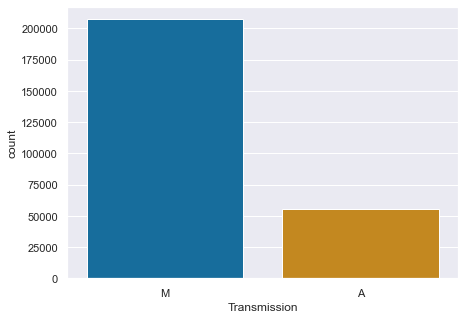

In [20]:
sns.set_style("darkgrid")
plt.figure(figsize=(7,5))
sns.countplot(x ='Transmission', data = df_copy, palette='colorblind')

We observe that automatic vehicles have more claim amounts and claim counts as compared to manual vehicles.

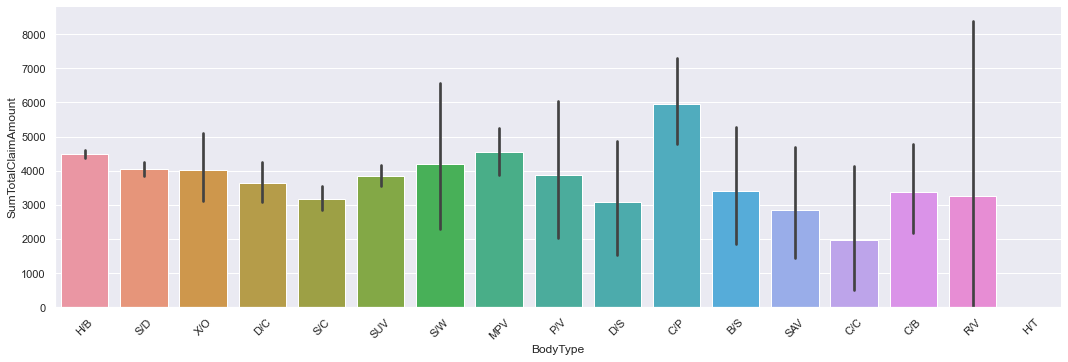

In [21]:
#Body Type
sns.catplot(x="BodyType", y="SumTotalClaimAmount",
            data=df_copy, kind='bar', height=5, aspect=3)
plt.xticks(rotation=45)
plt.show()

From the above plot we observe that C/P body type vehicles have the highest claim amount with C/C having the lowest claim amount.

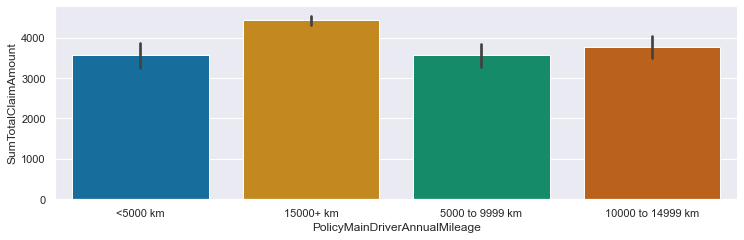

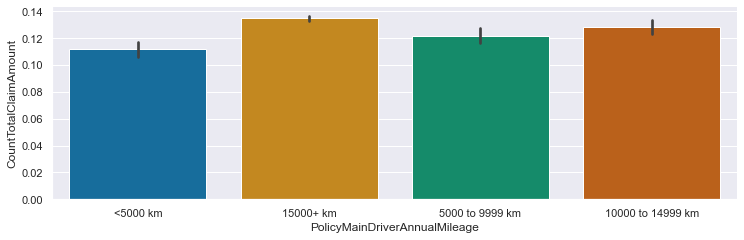

In [23]:
#Claim amount and claim count versus policy main driver annual mileage
sns.catplot(x="PolicyMainDriverAnnualMileage", y="SumTotalClaimAmount",
            data=df_copy, kind='bar', height=3.5, aspect=3, palette='colorblind')

sns.catplot(x="PolicyMainDriverAnnualMileage", y="CountTotalClaimAmount",
            data=df_copy, kind='bar', height=3.5, aspect=3, palette='colorblind') 



We observe that drivers with annual mileage of less than 15000 had the highest claim amounts and claim count. Drivers with an annual mileage of between 5000 and 9999 km had the least claim amount. Drivers with an annual mileage of 5000 km and below had the least claim count. 

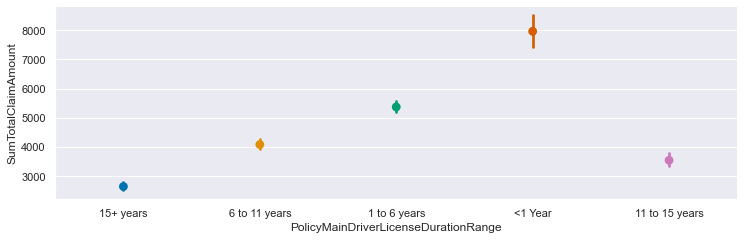

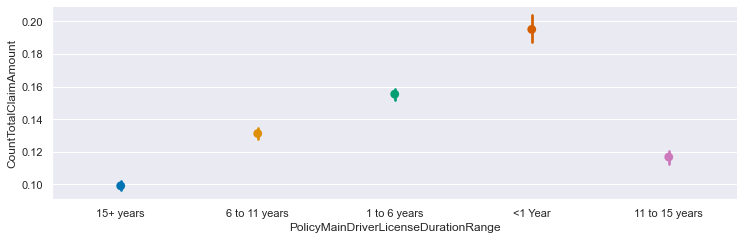

In [24]:
#Claim Amount Versus Policy Main Driver License Duration Range
sns.catplot(x="PolicyMainDriverLicenseDurationRange", y="SumTotalClaimAmount",
            data=df_copy, kind='point', height=3.5, aspect=3, palette='colorblind')

sns.catplot(x="PolicyMainDriverLicenseDurationRange", y="CountTotalClaimAmount",
            data=df_copy, kind='point', height=3.5, aspect=3, palette='colorblind')

We observe that drivers with license duration range of less than 1 year had the highest claim amount and claim count. Drivers with license duration range of more than 15 years had the least claim amount and claim count.

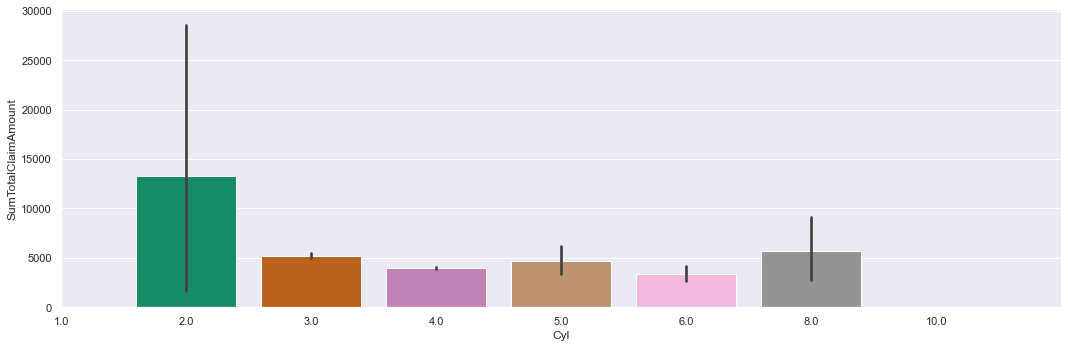

In [25]:
#Claim Amount Versus Cylinder Capacity
sns.catplot(x="Cyl", y="SumTotalClaimAmount",
            data=df_copy, kind='bar', height=5, aspect=3, palette='colorblind')

plt.xlim([1,9])
plt.show()

From the figure above we observe that vehicles with two cylinders capacity had the highest claim amount followed by those with eight cylinders. Six cylinder capcity vehicles had the lowest claim amount.

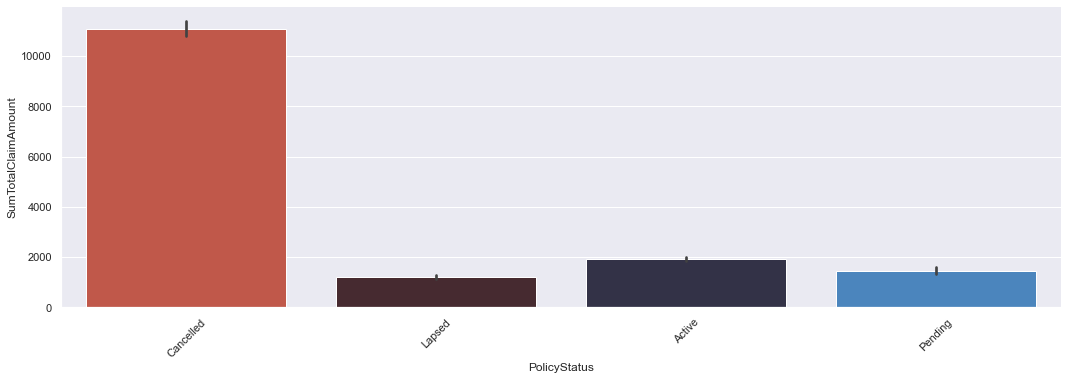

In [26]:
#Claim Amount Versus Policy Status
sns.catplot(x="PolicyStatus", y="SumTotalClaimAmount",
            data=df_copy, kind='bar', height=5, aspect=3, palette='icefire_r')
plt.xticks(rotation=45)
plt.show()

Claim amount is highest among cancelled policy status and lowest in the lapsed policy status

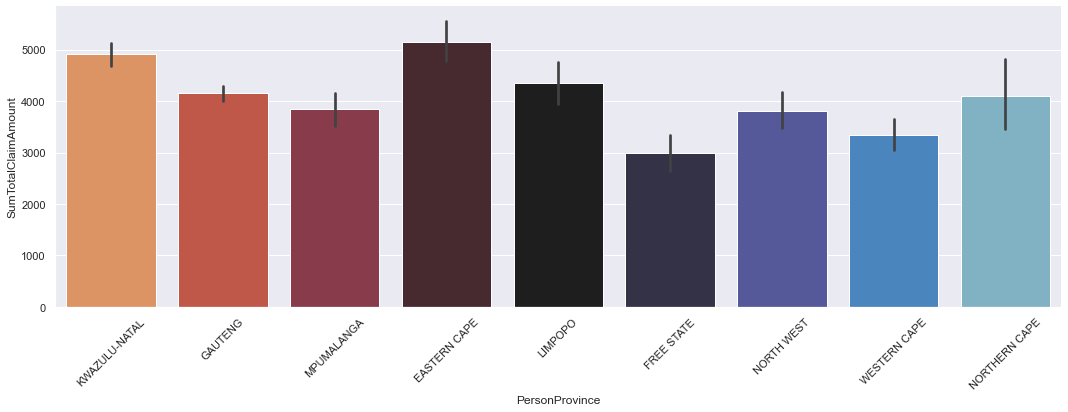

In [27]:
#Claim Amount Versus Person Province
sns.set(style ="darkgrid")
sns.catplot(x="PersonProvince", y="SumTotalClaimAmount",
            data=df_copy, kind='bar', height=5, aspect=3, palette='icefire_r')
plt.xticks(rotation=45)
plt.show()

Eastern Cape province had the highest claim amounts followed by KZN. Free State province had the least claim amount.

## Continuous Features
Next we will investigate how continuous features affect the claim amount.

### Premium
Firstly, we investigate whether the premium a customer pays affects the claim amount

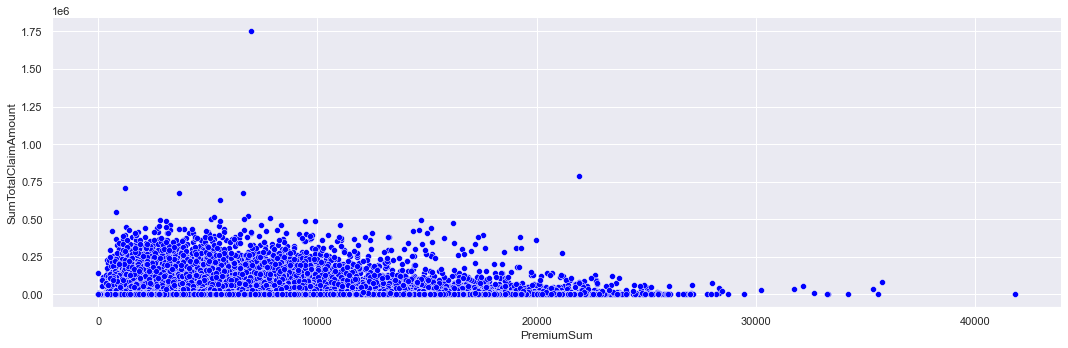

In [28]:
#Claim Amount Versus Premium
sns.set(style ="darkgrid")
sns.relplot(x="PremiumSum", y="SumTotalClaimAmount", data=df_copy, height=5, aspect=3, color='blue')

There doesn't seem to be a linear relationship between premium and claim amount.

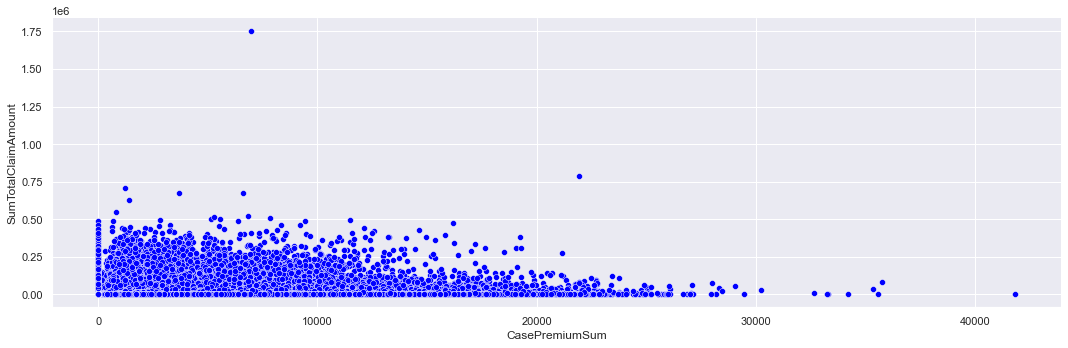

In [29]:
#Claim Amount Versus Case Premium
sns.set(style ="darkgrid")
sns.relplot(x="CasePremiumSum", y="SumTotalClaimAmount", data=df_copy, height=5, aspect=3, color='blue')

There doesn't seem to be a linear relationship between case premium and claim amount.

### Age 
Next we investigate how claim amounts vary with age of policyholders.

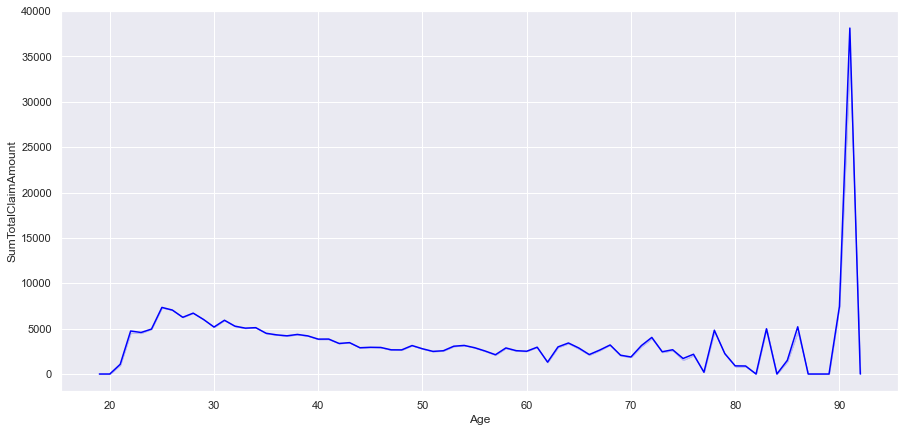

In [30]:
#Claim amount versus policyholder age
plt.figure(figsize=(15,7))
sns.lineplot(x=df_copy["Age"], y=df_copy["SumTotalClaimAmount"],ci=0, color='blue')
plt.show()

We observe that claim amount was moderately high among customers in mid-twenties and then declined steadily before shooting upwards among clients aged 90 and finally falling.

### Vehicle year of manufacture
We investigate how claim amount varies with vehicle year of manufacture.

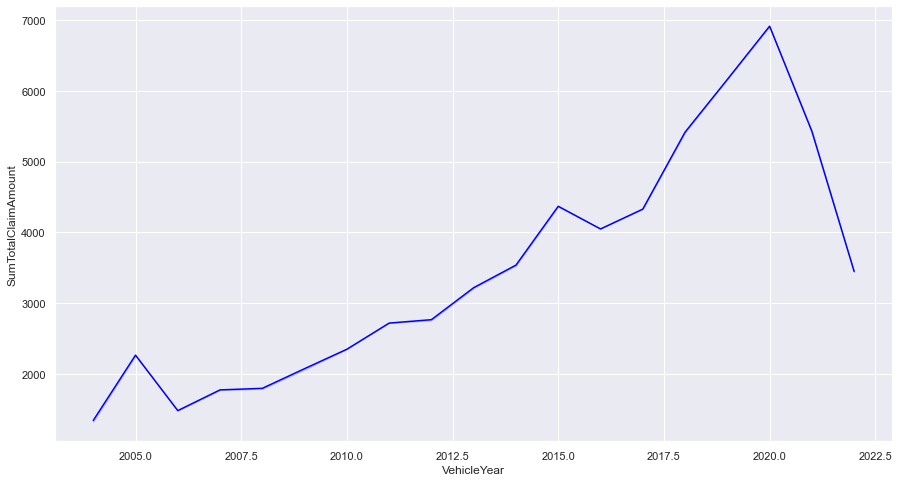

In [31]:
#Claim amount versus vehicle year of manufacture
plt.figure(figsize=(15,8))
sns.lineplot(x="VehicleYear", y="SumTotalClaimAmount",data = df_copy, ci=0, color='blue')
plt.show()

From the figure above we observe that claim amount rose with vehicle year of manufacture up to 2020. The claim amount then declined sharply for vehicles manufactured in 2021 and 2022.

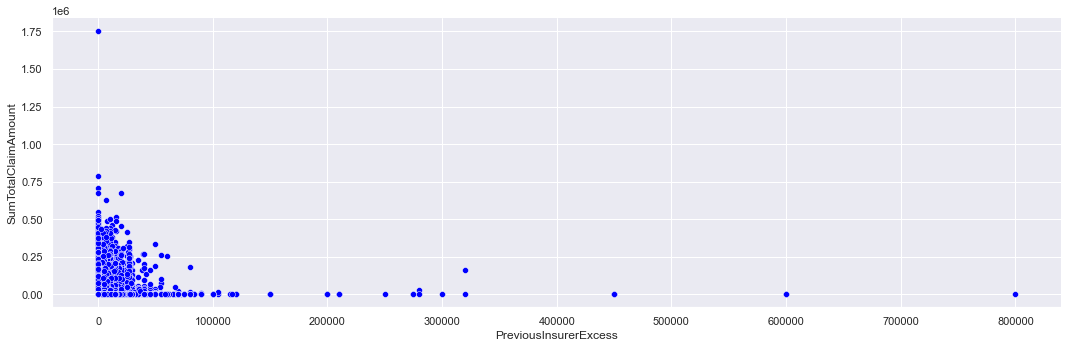

In [32]:
#Claim amount versus previous insurer excess
sns.set(style ="darkgrid")
sns.relplot(x="PreviousInsurerExcess", y="SumTotalClaimAmount", data=df_copy, height=5, aspect=3, color='blue')

There doesn't seem to be a linear relationship between Previous Insurer Excess and claim amount.

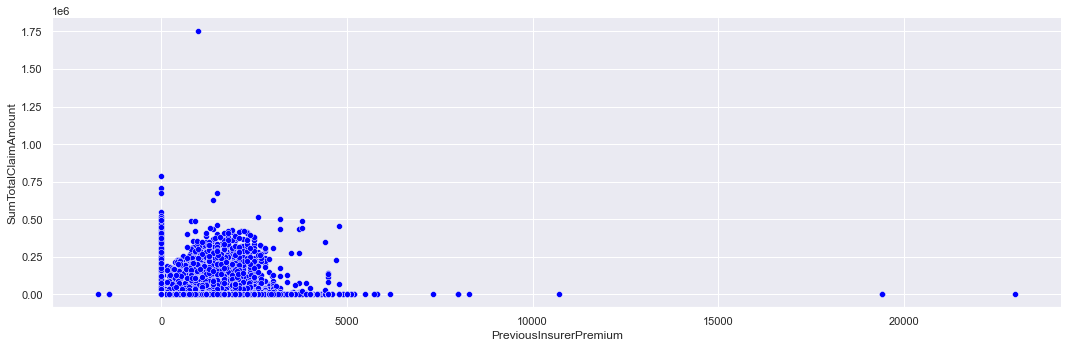

In [33]:
#Claim Amount Versus Previous Insurer Premium
sns.set(style ="darkgrid")
sns.relplot(x="PreviousInsurerPremium", y="SumTotalClaimAmount", data=df_copy, height=5, aspect=3, color='blue')

From the plot above there doesn't seem to be a linear relationship between Previous Insurer Premium and claim amount.

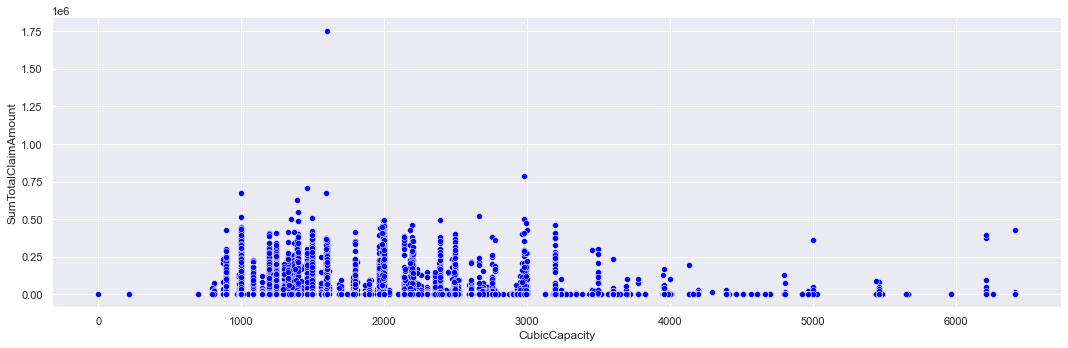

In [34]:
#Claim Amount Versus Vehicle Cubic Capacity
sns.set(style ="darkgrid")
sns.relplot(x="CubicCapacity", y="SumTotalClaimAmount", data=df_copy, height=5, aspect=3, color='blue')

From the plot above there doesn't seem to be a linear relationship between Vehicle Cubic Capacity and claim amount. The claim amount is highest among vehicles with 1000 to 3000cc and reduces for vehicles with higher capacity.

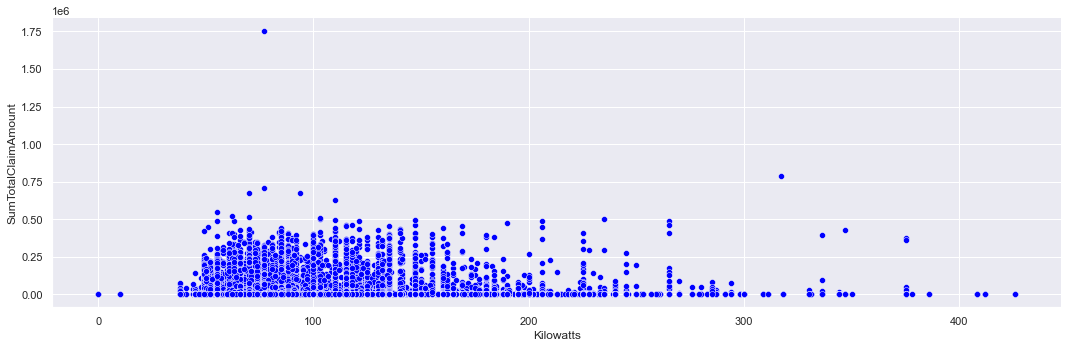

In [35]:
#Claim Amount Versus Kilowatts
sns.set(style ="darkgrid")
sns.relplot(x="Kilowatts", y="SumTotalClaimAmount", data=df_copy, height=5, aspect=3, color='blue')

From the plot above there doesn't seem to be a linear relationship between Vehicle kilowatts and claim amount. 

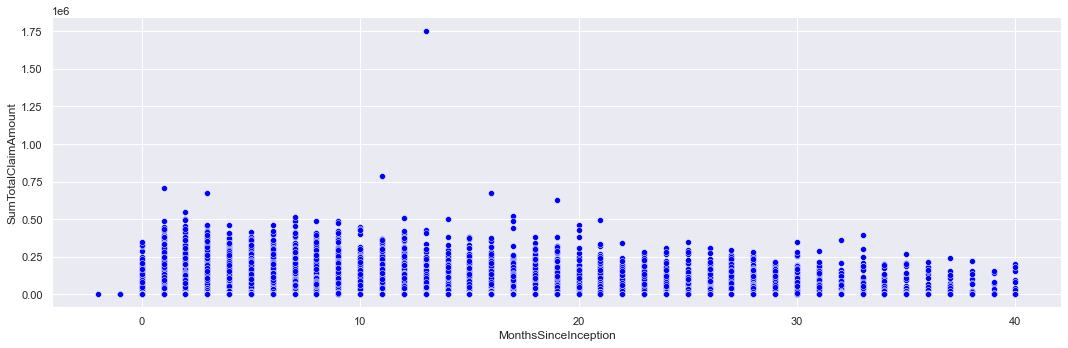

In [36]:
#Claim Amount Versus Months Since Inception
sns.set(style ="darkgrid")
sns.relplot(x="MonthsSinceInception", y="SumTotalClaimAmount", data=df_copy, height=5, aspect=3, color='blue')

From the plot above there doesn't seem to be a linear relationship between months since inception of policy and claim amount. 

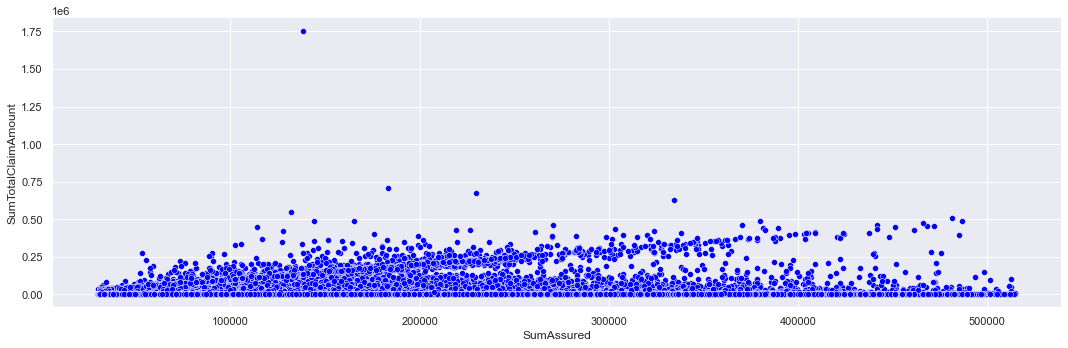

In [37]:
#Claim Amount Versus Sum Assured
sns.set(style ="darkgrid")
sns.relplot(x="SumAssured", y="SumTotalClaimAmount", data=df_copy, height=5, aspect=3, color='blue')

We observe a positive linear relationship between sum assured and claim amount. 

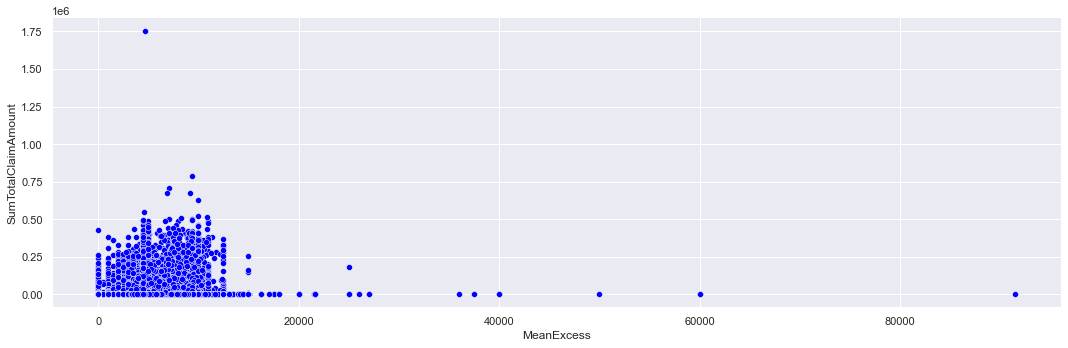

In [38]:
#Claim Amount Versus Mean Excess
sns.set(style ="darkgrid")
sns.relplot(x="MeanExcess", y="SumTotalClaimAmount", data=df_copy, height=5, aspect=3, color='blue')

From the plot claim amount is highest for mean excess below 20000.

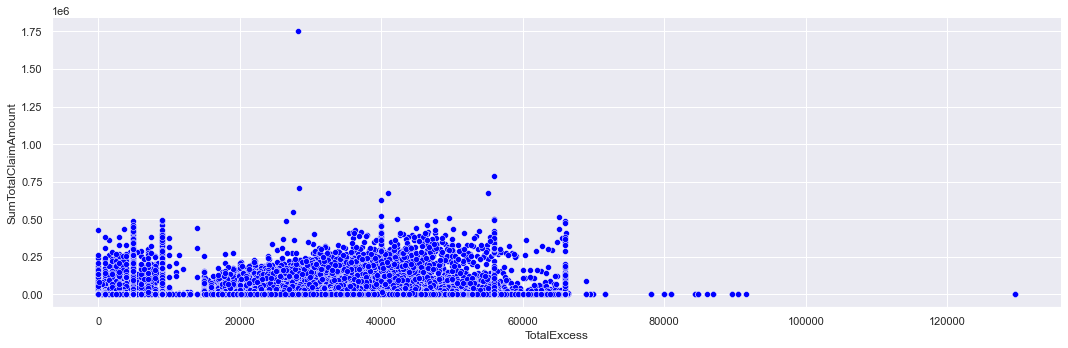

In [39]:
#Claim Amount Versus Total Excess
sns.set(style ="darkgrid")
sns.relplot(x="TotalExcess", y="SumTotalClaimAmount", data=df_copy, height=5, aspect=3, color='blue')

There is no linear relationship between total excess and claim amount

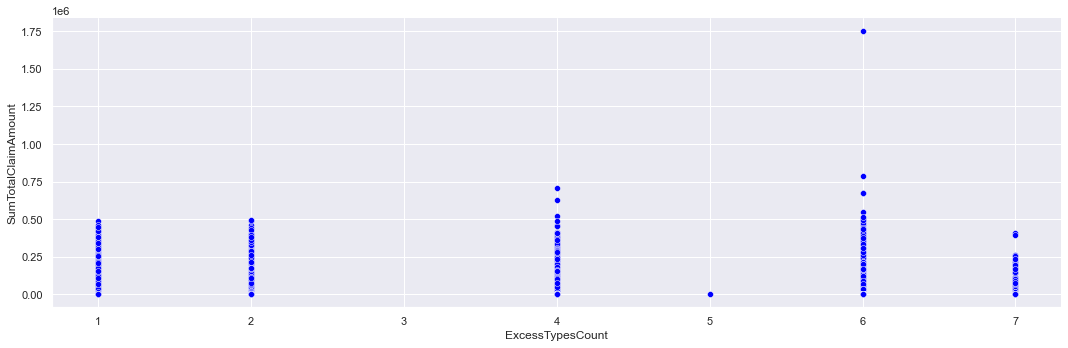

In [40]:
#Claim Amount Versus Total Excess
sns.set(style ="darkgrid")
sns.relplot(x="ExcessTypesCount", y="SumTotalClaimAmount", data=df_copy, height=5, aspect=3, color='blue')

We observe that claim amount is uniformly distributed among excess types count.

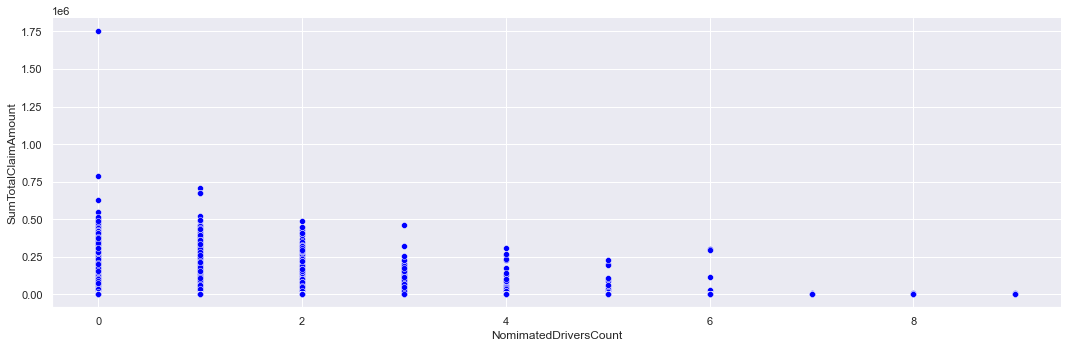

In [41]:
#Claim Amount Versus Total Excess
sns.set(style ="darkgrid")
sns.relplot(x="NomimatedDriversCount", y="SumTotalClaimAmount", data=df_copy, height=5, aspect=3, color='blue')

We observe a negative linear relationship between nominated drivers count and claim amount.

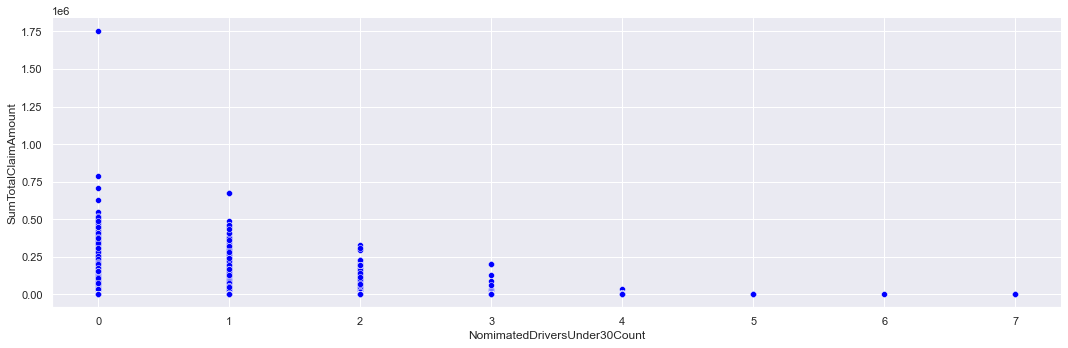

In [42]:
#Claim Amount Versus Total Excess
sns.set(style ="darkgrid")
sns.relplot(x="NomimatedDriversUnder30Count", y="SumTotalClaimAmount", data=df_copy, height=5, aspect=3, color='blue')

We observe a negative linear relationship between nominated drivers under 30 count and claim amount.

<a id='feat_eng'></a><br>
## 4. Data Preprocessing
[Back to Table of Contents](#Table_Contents)
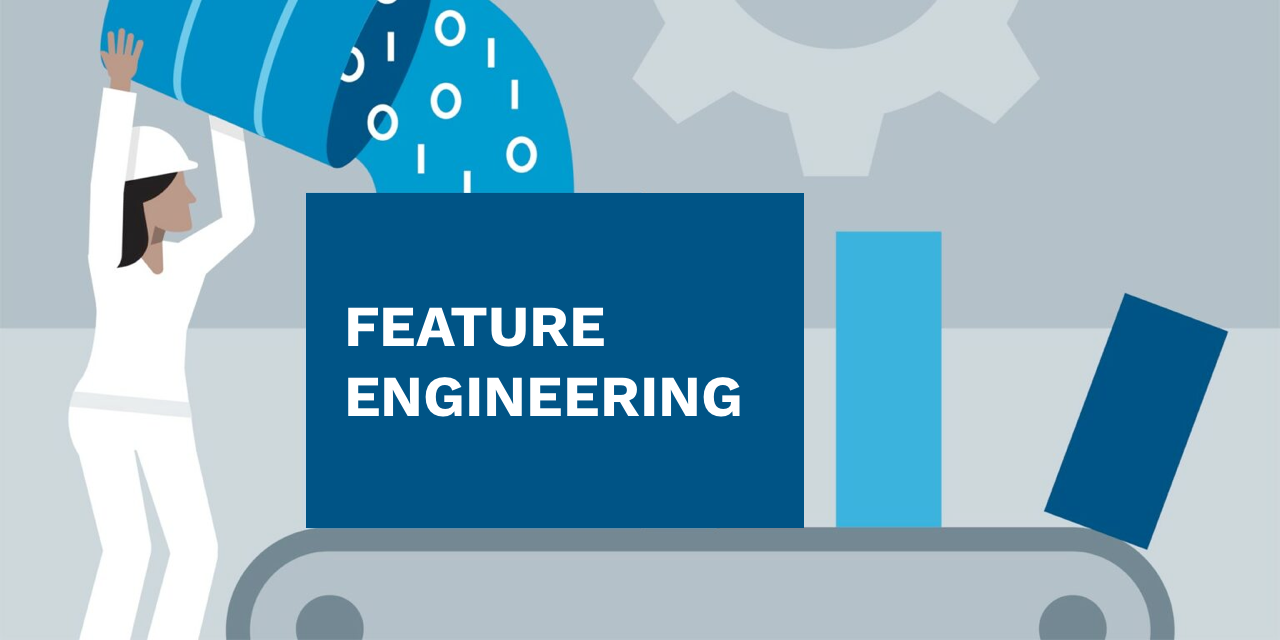

In this section we select and transform the most relevant variables from the data when so as to create a good machine learning model.


### Load the data

In [21]:
#Make copy of df
df_copy = df.copy()
df_copy.shape

(262990, 45)

### Drop unnecessary columns

In [22]:
#Drop irrelevant columns
df_copy = df_copy.drop(['ClaimId ', 'CountTotalClaimAmount', 'PremiumSum', 'CasePremiumSum', 'TotalPremiumPaymentCount', 
              'PaymentDueDate', 'PolicyStatus', 0.5865768182345752], axis=1)
df_copy.shape

(262990, 37)

### Check for missing values

In [23]:
#Check for missing values
df_copy.isna().mean()

PolicyId                                0.000000
SumTotalClaimAmount                     0.895844
PreviousInsurerExcess                   0.000103
PreviousInsurerPremium                  0.000110
EmploymentType                          0.010099
IsMemberPayer                           0.000000
Employer                                0.972296
Occupation                              0.008540
IndustryType                            0.015708
Gender                                  0.000030
BirthDt                                 0.000023
MaritalStatus                           0.000023
Make                                    0.000023
Model                                   0.000023
Colour                                  0.000023
Transmission                            0.000023
VehicleType                             0.000023
BodyType                                0.000023
CubicCapacity                           0.000023
Cyl                                     0.000023
Kilowatts           

### Drop columns with high percentage missing values

In [24]:
#Drop columns with high percentage missing values
df_copy = df_copy.drop(['Employer', 'MonthsSinceInception', 'DaysSinceInception'], axis=1)
df_copy.shape

(262990, 34)

### Drop redundant columns

In [25]:
#Drop redundant columns 
df_copy = df_copy.drop('Area', axis=1)
df_copy.shape

(262990, 33)

### Impute missing values
Impute with mean for numerical columns and mode for categorical

In [26]:
#Impute missing values
df_copy['SumTotalClaimAmount'].fillna(0, inplace=True)
df_copy['PreviousInsurerPremium'].fillna(0, inplace=True)
df_copy['SumAssured'].fillna(df_copy['SumAssured'].mean(), inplace=True)
df_copy['PreviousInsurerExcess'].fillna(df_copy['PreviousInsurerExcess'].mean(), inplace=True)
df_copy['EmploymentType'].fillna(df_copy['EmploymentType'].mode()[0], inplace=True)
df_copy['Occupation'].fillna(df_copy['Occupation'].mode()[0], inplace=True)
df_copy['IndustryType'].fillna(df_copy['IndustryType'].mode()[0], inplace=True)


### Convert policy end date to datetime

In [27]:
df_copy['PolicyEndDate'] = df_copy['PolicyEndDate'].astype('datetime64[ns]')

### Calculate exposure

In [28]:
df_copy["Exposure"] = [(-1*round((x-y).total_seconds()/(60*60*24))/365) 
                 if pd.isna(y)==False and (-1*round((x-y).total_seconds()/(60*60*24))/365)<1 
                 else 1 for x,y in zip(df_copy["CommencementDt"],df_copy["PolicyEndDate"])]
df_copy = df_copy[df_copy["Exposure"] > 0]

### Create Age Column

In [29]:
#Create 'Age' column
now = pd.Timestamp('now')
df_copy['BirthDt'] = pd.to_datetime(df_copy['BirthDt'], format='%m%d%y')   
df_copy['BirthDt'] = df_copy['BirthDt'].where(df_copy['BirthDt'] < now, df_copy['BirthDt'] -  np.timedelta64(100, 'Y'))   
df_copy['Age'] = (now - df_copy['BirthDt']).astype('<m8[Y]')

### Delete BirthDt, CommencementDt and PolicyEndDate Columns

In [30]:
df_copy.drop(['BirthDt', 'CommencementDt','PolicyEndDate'], axis=1, inplace=True)

### Check For Missing Values

In [31]:
df_copy.isna().sum()

PolicyId                                0
SumTotalClaimAmount                     0
PreviousInsurerExcess                   0
PreviousInsurerPremium                  0
EmploymentType                          0
IsMemberPayer                           0
Occupation                              0
IndustryType                            0
Gender                                  8
MaritalStatus                           6
Make                                    6
Model                                   6
Colour                                  6
Transmission                            6
VehicleType                             6
BodyType                                6
CubicCapacity                           6
Cyl                                     6
Kilowatts                               6
VehicleYear                             6
PolicyMainDriverAnnualMileage           6
PolicyMainDriverLicenseDurationRange    6
PersonProvince                          6
SumAssured                        

### Drop rows with multiple missing values

In [32]:
#Delete rows with multiple missing values
df_copy.dropna(axis=0, inplace=True)

### Extract first name of vehicle model

In [33]:
#Extract first name of vehicle model
df_copy['Model'] = df_copy.Model.str.split().str.get(0)

### Select top categories and replace rest with other

In [34]:
#Select top categories and replace rest with other
cat_features = [i for i in df_copy.columns if df_copy.dtypes[i]=='object']
top_n = 9
for cat in cat_features:
    df_copy[cat] = df_copy[cat].str.lower()
    top_cats = df_copy[cat].value_counts().head(top_n).index.tolist()
    df_copy.loc[~df_copy[cat].isin(top_cats), cat] = 'Other'

###  Binning of numerical columns

To facilitate easier linear modelling, we bin the numerical columns. 

In [35]:
#Numerical columns binarization
n_bins = 5
numeric = [i for i in list(df_copy.columns) if df_copy.dtypes[i]!='object' 
                if i not in ['SumTotalClaimAmount', 'Exposure', 'PolicyId']]

binarizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')

df_copy.loc[:, numeric] = binarizer.fit_transform(X=df_copy[numeric])

### One hot encoding of categorical columns

In [36]:
#Categorical columns hot encoding
category = [i for i in df_copy.columns if df_copy.dtypes[i]=='object']
for col in category:
    one_hot = pd.get_dummies(df_copy[col], prefix=col, prefix_sep='_', drop_first=True)
    df_copy = df_copy.join(one_hot)
    df_copy.drop([col], inplace=True, axis=1)



In [37]:
#Assign target variable
y = df_copy["SumTotalClaimAmount"]
X = df_copy.drop(["SumTotalClaimAmount", "PolicyId"], axis=1)


### Split into Train, Val, and Test Sets

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2/9, random_state=1)

In [39]:
#Scaling numerical columns

scaler = MinMaxScaler(feature_range=(0, 1), copy=True, clip=False)

categorical = [i for i in list(df_copy.columns) if i not in numeric 
                if i not in ['SumTotalClaimAmount', 'Exposure', 'PolicyId']]
X_train = pd.concat([pd.DataFrame(scaler.fit_transform(X_train[numeric]), columns=numeric), 
                     X_train["Exposure"].reset_index(drop=True), X_train[categorical].reset_index(drop=True)], axis=1)

X_val = pd.concat([pd.DataFrame(scaler.transform(X_val[numeric]), columns=numeric), 
                   X_val["Exposure"].reset_index(drop=True), X_val[categorical].reset_index(drop=True)], axis=1)

X_test = pd.concat([pd.DataFrame(scaler.transform(X_test[numeric]), columns=numeric), 
                    X_test["Exposure"].reset_index(drop=True), X_test[categorical].reset_index(drop=True)], axis=1)


<a id='model'></a><br>
## 5. Model Building
[Back to Table of Contents](#Table_Contents)

In this section we build machine learning models to predict insurance claim amount given input features. We will train a linear regression model and Extreme Gradient Boosting (XGBoost) regression model and assess their performance to determine which one performs better.

#### Linear Model

In [51]:
### Modelling
lr = LinearRegression()

# Train the model using the training set
lr.fit(X_train.drop(['Exposure'], axis=1), y_train)

# Make predictions on the validation set
y_pred_lr = lr.predict(X_val.drop(['Exposure'], axis=1))

# Print root mean squared error on the validation set
print('RMSE on validation set:')
print(sqrt(mean_squared_error(y_val, y_pred_lr)))
print('')

# Print mean absolute error on the validation set
print('MAE on validation set:')
print(mean_absolute_error(y_val, y_pred_lr))
print('')

# Print mean absolute percentage error on the validation set
print('MAPE on validation set:')
print(mean_absolute_percentage_error(y_val, y_pred_lr))
print('')

# Print R squared on the validation set
print('R squared on validation set:')
print(r2_score(y_val, y_pred_lr))

RMSE on validation set:
24271.47801659942

MAE on validation set:
7716.351412464559

MAPE on validation set:
1.733954782624997e+19

R squared on validation set:
0.011361779061288213


In [52]:
# Print other metrics on the actual and predicted claim amounts
print('Actual mean claim amount:')
print(y_val.mean())
print('')

print('Predicted mean claim amount:')
print(y_pred_lr.mean())
print('')

print('Actual claim standard deviation:')
print(y_val.std())
print('')

print('Predicted claim standard deviation:')
print(y_pred_lr.std())

Actual mean claim amount:
4212.389231178801

Predicted mean claim amount:
4250.406601578019

Actual claim standard deviation:
24410.779890546622

Predicted claim standard deviation:
2487.886127699767


### Actual Claims Amount Distribution

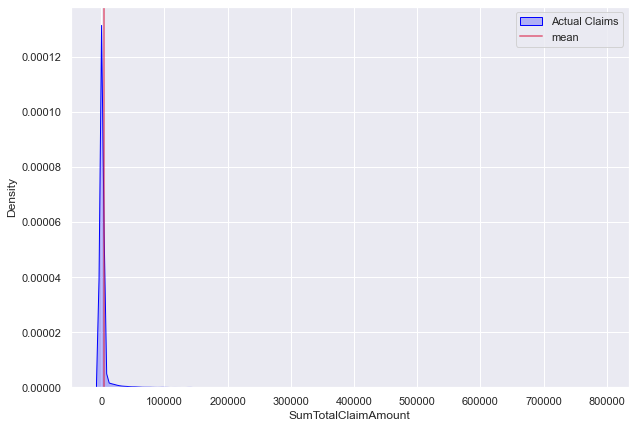

In [44]:
plt.figure(figsize=(10,7))

sns.kdeplot(y_val, color="blue", shade=True, label="Actual Claims")
plt.axvline(x=y_val.mean(), linewidth=2, color='crimson', label="mean", alpha=0.5)
plt.legend()
plt.show()

### Predicted Claims Amount Distribution

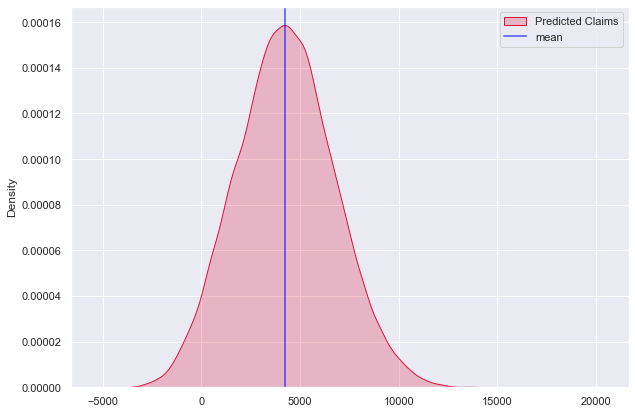

In [45]:
plt.figure(figsize=(10,7))

sns.kdeplot(y_val_pred, color="crimson", shade=True, label="Predicted Claims")
plt.axvline(x=y_val_pred.mean(), linewidth=2, color='blue', label="mean", alpha=0.5)
plt.legend()
plt.show()

We notice that the predicted claim amounts have a normal distribution. 

### Actual Versus Predicted Claim Amount Distribution

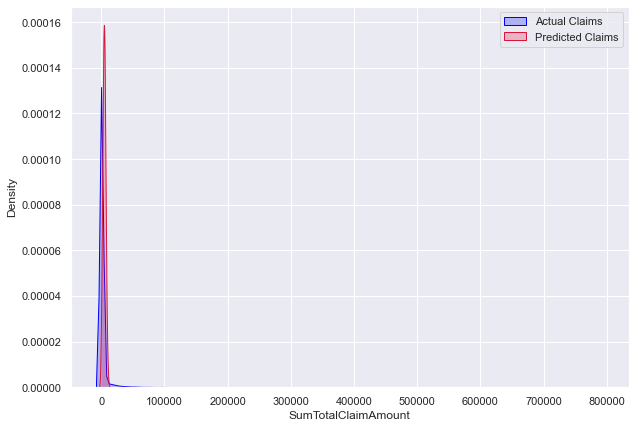

In [46]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.kdeplot(y_val, color="blue", shade=True, label="Actual Claims")
sns.kdeplot(y_val_pred, color="crimson", shade=True, label="Predicted Claims")

plt.legend() 
plt.show()

In [47]:
#Pickle the trained model
pickle.dump(lr, open('linear_model.pkl', 'wb'))

### XGBOOST Model

In [48]:
#Remove < in feature names
X_train.columns = X_train.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))
X_val.columns = X_val.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))
X_test.columns = X_test.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))

In [49]:
#Model fitting
EXPOSURE_TRAIN = X_train["Exposure"]

xg_model = XGBRegressor()
xg_model.fit(X=X_train.drop(['Exposure'], axis=1).values, y = y_train.values, eval_metric = "rmse",
             eval_set= [(X_val.drop(['Exposure'], axis=1).values, y_val.values)], verbose=True, sample_weight=EXPOSURE_TRAIN)

C:\Users\Hudson\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[0]	validation_0-rmse:24510.71596
[1]	validation_0-rmse:24391.30389
[2]	validation_0-rmse:24336.09531
[3]	validation_0-rmse:24309.08929
[4]	validation_0-rmse:24287.46501
[5]	validation_0-rmse:24288.00593
[6]	validation_0-rmse:24281.46502
[7]	validation_0-rmse:24286.24356
[8]	validation_0-rmse:24294.58540
[9]	validation_0-rmse:24304.37075
[10]	validation_0-rmse:24308.62326
[11]	validation_0-rmse:24310.54612
[12]	validation_0-rmse:24306.65665
[13]	validation_0-rmse:24306.36745
[14]	validation_0-rmse:24307.68468
[15]	validation_0-rmse:24309.92826
[16]	validation_0-rmse:24309.35529
[17]	validation_0-rmse:24307.64803
[18]	validation_0-rmse:24316.94510
[19]	validation_0-rmse:24320.61158
[20]	validation_0-rmse:24322.77480
[21]	validation_0-rmse:24323.19686
[22]	validation_0-rmse:24327.11928
[23]	validation_0-rmse:24329.83382
[24]	validation_0-rmse:24330.68352
[25]	validation_0-rmse:24336.77321
[26]	validation_0-rmse:24339.40912
[27]	validation_0-rmse:24339.99729
[28]	validation_0-rmse:24341.9

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### Metrics

In [56]:
# Make predictions on the training and validation sets
y_pred_xg = xg_model.predict(X_val.drop(['Exposure'], axis=1))

# Print root mean squared error on the validation set
print('RMSE on validation set:')
print(sqrt(mean_squared_error(y_val, y_pred_xg)))
print('')

# Print mean absolute error on the validation set
print('MAE on validation set:')
print(mean_absolute_error(y_val, y_pred_xg))
print('')

# Print mean absolute percentage error on the validation set
print('MAPE on validation set:')
print(mean_absolute_percentage_error(y_val, y_pred_xg))
print('')

# Print R squared on the validation set
print('R squared on validation set:')
print(r2_score(y_val, y_pred_xg))

RMSE on validation set:
24551.359461236956

MAE on validation set:
7674.626422287506

MAPE on validation set:
1.7026068556101839e+19

R squared on validation set:
-0.011570228280983752


In [54]:
# Print other metrics on the actual and predicted claim amounts
print('Actual mean claim amount:')
print(y_val.mean())
print('')

print('Predicted mean claim amount:')
print(y_pred_xg.mean())
print('')

print('Actual claim standard deviation:')
print(y_val.std())
print('')

print('Predicted claim standard deviation:')
print(y_pred_xg.std())

Actual mean claim amount:
4212.389231178801

Predicted mean claim amount:
4201.0923

Actual claim standard deviation:
24410.779890546622

Predicted claim standard deviation:
5433.0605


#### Predicted Claims Amount Distribution

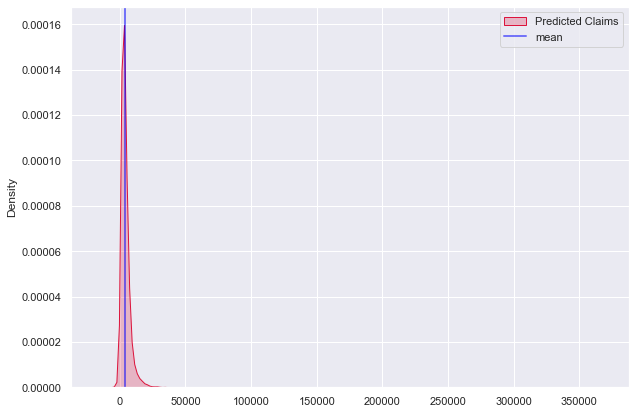

In [55]:
plt.figure(figsize=(10,7))

sns.kdeplot(y_pred_xg, color="crimson", shade=True, label="Predicted Claims")
plt.axvline(x=y_pred_xg.mean(), linewidth=2, color='blue', label="mean", alpha=0.5)
plt.legend()
plt.show()

#### XGBoost Model Tuning
We tune the hyperparameters of the XGBoost model to improve performance

In [ ]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgbr = XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train.drop(['Exposure'], axis=1), y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

In [31]:
final_model = XGBRegressor(
 learning_rate =0.05,
 n_estimators=500,
 max_depth=3,
 objective='reg:tweedie',
 colsample_bytree=0.3)
final_model.fit(X=X_train.drop(['Exposure'], axis=1).values, y = y_train.values, eval_metric = "rmse",
             eval_set= [(X_val.drop(['Exposure'], axis=1).values, y_val.values)], verbose=True, sample_weight=EXPOSURE_TRAIN)

C:\Users\Hudson\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[0]	validation_0-rmse:24771.24170
[1]	validation_0-rmse:24771.23158
[2]	validation_0-rmse:24771.22079
[3]	validation_0-rmse:24771.20852
[4]	validation_0-rmse:24771.19530
[5]	validation_0-rmse:24771.18095
[6]	validation_0-rmse:24771.16490
[7]	validation_0-rmse:24771.14642
[8]	validation_0-rmse:24771.12650
[9]	validation_0-rmse:24771.10477
[10]	validation_0-rmse:24771.08048
[11]	validation_0-rmse:24771.05379
[12]	validation_0-rmse:24771.02392
[13]	validation_0-rmse:24770.99081
[14]	validation_0-rmse:24770.95493
[15]	validation_0-rmse:24770.91533
[16]	validation_0-rmse:24770.87106
[17]	validation_0-rmse:24770.82212
[18]	validation_0-rmse:24770.76778
[19]	validation_0-rmse:24770.70875
[20]	validation_0-rmse:24770.64315
[21]	validation_0-rmse:24770.57074
[22]	validation_0-rmse:24770.49011
[23]	validation_0-rmse:24770.40145
[24]	validation_0-rmse:24770.30361
[25]	validation_0-rmse:24770.19536
[26]	validation_0-rmse:24770.07680
[27]	validation_0-rmse:24769.94513
[28]	validation_0-rmse:24769.7

[231]	validation_0-rmse:24255.33799
[232]	validation_0-rmse:24255.45115
[233]	validation_0-rmse:24255.57709
[234]	validation_0-rmse:24255.19118
[235]	validation_0-rmse:24255.22991
[236]	validation_0-rmse:24255.01607
[237]	validation_0-rmse:24255.09456
[238]	validation_0-rmse:24254.76202
[239]	validation_0-rmse:24254.62360
[240]	validation_0-rmse:24254.60027
[241]	validation_0-rmse:24254.45224
[242]	validation_0-rmse:24254.28389
[243]	validation_0-rmse:24254.43314
[244]	validation_0-rmse:24254.33456
[245]	validation_0-rmse:24254.05132
[246]	validation_0-rmse:24253.77978
[247]	validation_0-rmse:24253.44771
[248]	validation_0-rmse:24253.40236
[249]	validation_0-rmse:24253.18451
[250]	validation_0-rmse:24252.94825
[251]	validation_0-rmse:24252.68346
[252]	validation_0-rmse:24252.82683
[253]	validation_0-rmse:24252.64117
[254]	validation_0-rmse:24252.51117
[255]	validation_0-rmse:24252.42047
[256]	validation_0-rmse:24252.43427
[257]	validation_0-rmse:24252.31966
[258]	validation_0-rmse:2425

[459]	validation_0-rmse:24241.16909
[460]	validation_0-rmse:24241.08566
[461]	validation_0-rmse:24240.83201
[462]	validation_0-rmse:24240.82861
[463]	validation_0-rmse:24240.86821
[464]	validation_0-rmse:24240.83953
[465]	validation_0-rmse:24240.84818
[466]	validation_0-rmse:24240.56809
[467]	validation_0-rmse:24240.67333
[468]	validation_0-rmse:24240.67271
[469]	validation_0-rmse:24240.66404
[470]	validation_0-rmse:24240.51255
[471]	validation_0-rmse:24240.36652
[472]	validation_0-rmse:24240.16435
[473]	validation_0-rmse:24240.19772
[474]	validation_0-rmse:24240.15628
[475]	validation_0-rmse:24240.50840
[476]	validation_0-rmse:24240.46265
[477]	validation_0-rmse:24240.50020
[478]	validation_0-rmse:24240.44974
[479]	validation_0-rmse:24240.40629
[480]	validation_0-rmse:24240.37272
[481]	validation_0-rmse:24240.24296
[482]	validation_0-rmse:24240.29311
[483]	validation_0-rmse:24240.28587
[484]	validation_0-rmse:24240.34965
[485]	validation_0-rmse:24240.33787
[486]	validation_0-rmse:2424

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, objective='reg:tweedie', predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [32]:
# Make predictions on the training and validation sets
y_pred_final = final_model.predict(X_val.drop(['Exposure'], axis=1))

# Print root mean squared error on the validation set
print('RMSE on validation set:')
print(sqrt(mean_squared_error(y_val, y_pred_final)))
print('')

# Print mean absolute error on the validation set
print('MAE on validation set:')
print(mean_absolute_error(y_val, y_pred_final))
print('')

# Print mean absolute percentage error on the validation set
print('MAPE on validation set:')
print(mean_absolute_percentage_error(y_val, y_pred_final))
print('')

# Print R squared on the validation set
print('R squared on validation set:')
print(r2_score(y_val, y_pred_final))

MSE on validation set:
587569046.3963891

RMSE on validation set:
24239.82356363984

MAE on validation set:
7471.121245741166

MAPE on validation set:
1.6205232731304006e+19

R squared on validation set:
0.01393882813595948


In [ ]:
# Print other metrics on the actual and predicted claim amounts
print('Actual mean claim amount:')
print(y_val.mean())
print('')

print('Predicted mean claim amount:')
print(y_pred_final.mean())
print('')

print('Actual claim standard deviation:')
print(y_val.std())
print('')

print('Predicted claim standard deviation:')
print(y_pred_final.std())

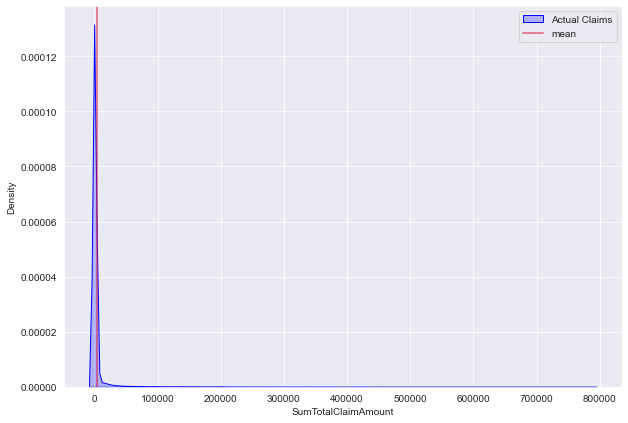

In [36]:
plt.figure(figsize=(10,7))

sns.kdeplot(y_val, color="blue", shade=True, label="Actual Claims")
plt.axvline(x=y_val.mean(), linewidth=2, color='crimson', label="mean", alpha=0.5)
plt.legend()
plt.show()

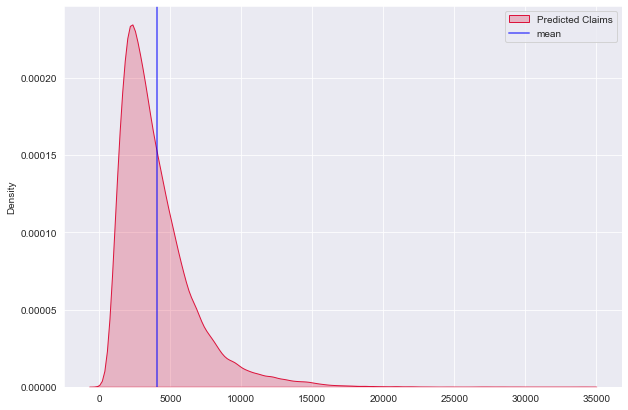

In [33]:
plt.figure(figsize=(10,7))

sns.kdeplot(y_val_pred, color="crimson", shade=True, label="Predicted Claims")
plt.axvline(x=y_val_pred.mean(), linewidth=2, color='blue', label="mean", alpha=0.5)
plt.legend()
plt.show()

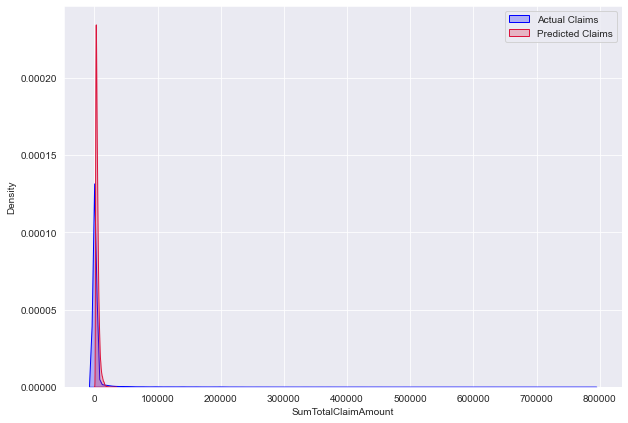

In [34]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.kdeplot(y_val, color="blue", shade=True, label="Actual Claims")
sns.kdeplot(y_val_pred, color="crimson", shade=True, label="Predicted Claims")

plt.legend() 
plt.show()

In [35]:
# Print other metrics on the predicted claim amounts
print('Mean claim amount:')
print(y_val_pred.mean())

print('Claim amount variance:')
print(y_val_pred.var())

print('Claim amount standard deviation:')
print(y_val_pred.std())

Mean claim amount:
4042.2317
Claim amount variance:
6987043.5
Claim amount standard deviation:
2643.3015


In [38]:
X_train.columns

Index(['PreviousInsurerExcess', 'PreviousInsurerPremium', 'IsMemberPayer',
       'CubicCapacity', 'Cyl', 'Kilowatts', 'VehicleYear', 'SumAssured',
       'MeanExcess', 'TotalExcess', 'ExcessTypesCount', 'BaseExcess',
       'NomimatedDriversCount', 'NomimatedDriversUnder30Count', 'Age',
       'Exposure', 'EmploymentType_part-time', 'EmploymentType_permanent',
       'EmploymentType_retired', 'EmploymentType_self-employed',
       'EmploymentType_temporary / casual', 'EmploymentType_unemployed',
       'Occupation_driver', 'Occupation_educator', 'Occupation_manager',
       'Occupation_nurse', 'Occupation_operator', 'Occupation_police officer',
       'Occupation_self employed', 'Occupation_supervisor',
       'Occupation_teacher', 'IndustryType_charity',
       'IndustryType_construction', 'IndustryType_government',
       'IndustryType_government education', 'IndustryType_medical',
       'IndustryType_mining', 'IndustryType_office / clerical / manager',
       'IndustryType_other',